In [60]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = r'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [61]:
# Cleaning
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [63]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [64]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [67]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [68]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


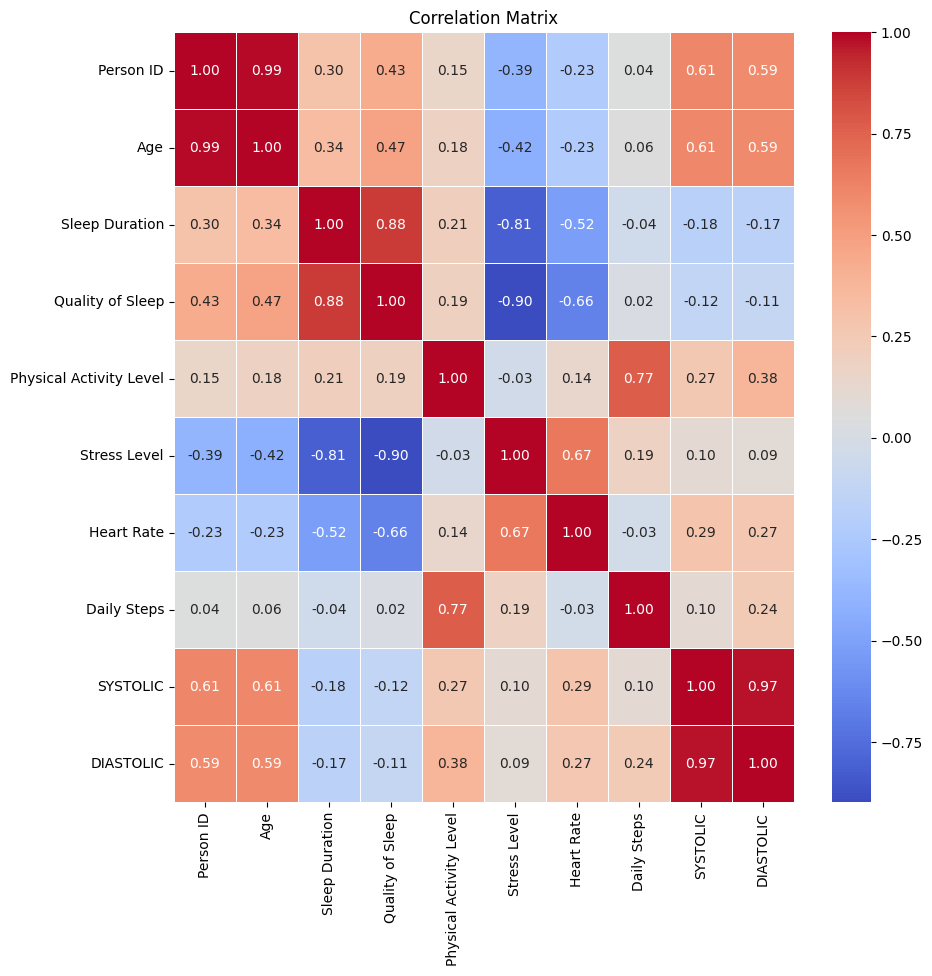

In [69]:
# Analysis
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[num_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [70]:
import plotly.express as px

# Assuming 'data' is your DataFrame and it contains a column named 'Sleep Disorder'
fig = px.histogram(data, x='Sleep Disorder', title='Distribution of Sleep Disorder',
                    labels={'Sleep Disorder': 'Sleep Disorder'}, 
                    color='Sleep Disorder',
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorder",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper background
    bargap=0,  # Set the gap between bars to 0
    bargroupgap=0.1  # Set the gap between groups of bars
)

# Set opacity of the bars
fig.update_traces(opacity=0.75)

fig.show()

In [71]:
fig = px.bar(data, x='Sleep Disorder', color='Gender', 
                title='Gender-wise Sleep Disorder Distribution',
                labels={'Sleep Disorder': 'Sleep Disorder', 'Gender': 'Gender', 'count': 'Count'},
                template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Gender-wise Sleep Disorder Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
    barnorm='percent',
)

fig.show()

In [72]:
occupation_counts = data['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

fig = px.bar(occupation_counts, x='Occupation', y='Count', 
                title='Distribution of Sleep Disorders by Occupation',
                labels={'Occupation': 'Occupation', 'Count': 'Count'},
                template='plotly_dark',
                text='Count')

fig.update_layout(
    xaxis_title='Occupation',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorders by Occupation",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
)

fig.update_xaxes(tickangle=45)

fig.show()

In [73]:
fig = px.histogram(data, x='Age', color='Sleep Disorder', 
                    title='Age Distribution with Sleep Disorder',
                    labels={'Age': 'Age', 'count': 'Count'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title={
        'text': "Age Distribution with Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2
)

fig.show()

In [74]:
fig = px.scatter(data, x='Sleep Duration', y='Quality of Sleep', color='Sleep Disorder', 
                    title='Sleep Duration vs. Quality of Sleep',
                    labels={'Sleep Duration': 'Sleep Duration', 'Quality of Sleep': 'Quality of Sleep'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Sleep Duration',
    yaxis_title='Quality of Sleep',
    title={
        'text': "Sleep Duration vs. Quality of Sleep",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [75]:
fig = px.scatter(data, x='Physical Activity Level', y='Stress Level', color='Sleep Disorder', 
                    title='Stress Level vs. Physical Activity Level',
                    labels={'Physical Activity Level': 'Physical Activity Level', 'Stress Level': 'Stress Level'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Physical Activity Level',
    yaxis_title='Stress Level',
    title={
        'text': "Stress Level vs. Physical Activity Level",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [76]:
fig = px.histogram(data, x='Heart Rate', color='Sleep Disorder', 
                    title='Heart Rate Distribution by Sleep Disorder',
                    labels={'Heart Rate': 'Heart Rate', 'count': 'Count'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Heart Rate',
    yaxis_title='Count',
    title={
        'text': "Heart Rate Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [77]:
fig = px.histogram(data, x='Daily Steps', color='Sleep Disorder', 
                    title='Daily Steps Distribution by Sleep Disorder',
                    labels={'Daily Steps': 'Daily Steps', 'count': 'Count'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Daily Steps',
    yaxis_title='Count',
    title={
        'text': "Daily Steps Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [78]:
fig = px.scatter(data, x='SYSTOLIC', y='DIASTOLIC', color='Sleep Disorder', 
                    title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder',
                    labels={'SYSTOLIC': 'Systolic Blood Pressure', 'DIASTOLIC': 'Diastolic Blood Pressure'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='Systolic Blood Pressure',
    yaxis_title='Diastolic Blood Pressure',
    title={
        'text': "Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [79]:
fig = px.histogram(data, x='BMI Category', color='Sleep Disorder', 
                    title='BMI Category Distribution by Sleep Disorder',
                    labels={'BMI Category': 'BMI Category', 'count': 'Count'},
                    template='plotly_dark')

fig.update_layout(
    xaxis_title='BMI Category',
    yaxis_title='Count',
    title={
        'text': "BMI Category Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [80]:
# Renaming
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [81]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [82]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64

In [83]:
# Encoding
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
cat_columns = ['Occupation', 'BMI Category', 'Sleep Disorder', 'Gender']

for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# # Save label encoders
# for col, le in label_encoders.items():
#     joblib.dump(le, f'{col}_label_encoder.pkl')

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,27,5,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,5,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,1,28,5,5.9,4,30,8,1,85,3000,2,140.0,90.0


In [84]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [85]:
# Balancing and Scaling
from imblearn.over_sampling import SMOTE

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)

In [87]:
# Splitting and Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# # Save the scaler using joblib
# joblib.dump(scaler, 'minmax_scaler_split.pkl')

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8535353535353535
Precision: 0.8534375229290483
Recall: 0.8535353535353535
F1-score: 0.8533523642219295


In [89]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8737373737373737
Precision: 0.8799970484750809
Recall: 0.8737373737373737
F1-score: 0.8746132454501515


In [90]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.4, max_depth=8, random_state=1)

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8636363636363636
Precision: 0.8650994067660734
Recall: 0.8636363636363636
F1-score: 0.8637258278055273


In [91]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5858585858585859
Precision: 0.7384415738582405
Recall: 0.5858585858585859
F1-score: 0.5824320853349935


In [92]:
# Hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the DecisionTreeClassifier with class_weight='balanced'
model = DecisionTreeClassifier(class_weight='balanced')

# Fit the model on the training data
model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8737373737373737
Precision: 0.8746610009321873
Recall: 0.8737373737373737
F1-score: 0.8735966673765716


In [93]:
# import joblib

# joblib.dump(model, 'best_model_decision_tree.pkl')

# print("Model saved successfully!")